In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 1000
xTrue = np.linspace(0, 1000, N)
yTrue = 3 * xTrue
xData = xTrue + np.random.normal(0, 100, N)
yData = yTrue + np.random.normal(0, 100, N)
xData = np.reshape(xData, (N, 1))
yData = np.reshape(yData, (N, 1))
all_samples = np.hstack((xData, yData)).T

In [36]:
all_samples

array([[   38.84886237,   204.34001189,    24.72497641, ...,
          965.53994811,  1120.74826723,   980.8349768 ],
       [   53.69867776,    25.80968717,   -84.46786169, ...,
         2884.92661562,  3009.25486367,  2958.46885249]])

In [46]:
mean_vector = np.mean(data, axis=0)[None].T

In [47]:
dimensions = all_samples.shape[0]

In [72]:
all_samples[:,0].reshape(2,1)

array([[ 38.84886237,  53.69867776]])

In [97]:
scatter_matrix = np.zeros((dimensions,dimensions))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i][None].T - mean_vector).dot((all_samples[:,i][None].T - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[  9.22886974e+07   2.48464853e+08]
 [  2.48464853e+08   7.61920739e+08]]


In [98]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

In [99]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i][None].T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

In [127]:
eig_val_sc

array([  1.01676115e+07,   8.44041825e+08])

In [107]:
eig_vec_sc

array([[-0.94948334, -0.31381744],
       [ 0.31381744, -0.94948334]])

In [105]:
eigenvectors

array([[-0.3184554 , -0.94793785],
       [-0.94793785,  0.3184554 ]])

In [84]:
for v in eig_vec_sc.T:
    print (v)

[-0.94948334  0.31381744]
[-0.31381744 -0.94948334]


In [116]:
mean_vector.ravel()

array([  500.78182659,  1497.68964276])

mean [start] [  500.78182659  1497.68964276] eigen-vector [end] [-0.94948334 -0.31381744]
mean [start] [  500.78182659  1497.68964276] eigen-vector [end] [ 0.31381744 -0.94948334]


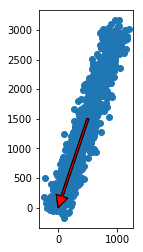

In [121]:
fig, ax = plt.subplots()
ax.scatter(xData, yData)

for v in eig_vec_sc:
    print ('mean [start]',mean_vector.ravel(),'eigen-vector [end]',v)
    ax.annotate('', xy=v, xycoords='data',xytext=mean_vector.ravel(), textcoords='data',arrowprops=dict(facecolor='red', width=2.0))

ax.set_aspect('equal')
plt.show()

In [ ]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])

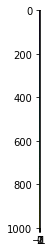

In [6]:
plt.imshow(data)

[-0.31354505 -0.94957333] 508.806683643 [  506.44872979  1500.27400799] [-159.53381732 -483.14925484]
[  506.44872979  1500.27400799] [  346.91491247  1017.12475315]
[-0.94957333  0.31354505] 508.806683643 [  506.44872979  1500.27400799] [-483.14925484  159.53381732]
[  506.44872979  1500.27400799] [   23.29947495  1659.80782531]


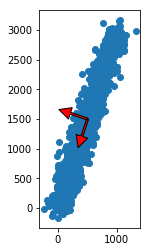

In [128]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
xTrue = np.linspace(0, 1000, N)
yTrue = 3 * xTrue
xData = xTrue + np.random.normal(0, 100, N)
yData = yTrue + np.random.normal(0, 100, N)
xData = np.reshape(xData, (N, 1))
yData = np.reshape(yData, (N, 1))
data = np.hstack((xData, yData))

mu = data.mean(axis=0)
data = data - mu
# data = (data - mu)/data.std(axis=0)  # Uncommenting this reproduces mlab.PCA results
eigenvectors, eigenvalues, V = np.linalg.svd(data.T, full_matrices=False)
projected_data = np.dot(data, eigenvectors)
sigma = projected_data.std(axis=0).mean()
#print(eigenvectors)

fig, ax = plt.subplots()
ax.scatter(xData, yData)
for axis in eigenvectors:
    print (axis, sigma, mu, sigma * axis)
    start, end = mu, mu + sigma * axis
    print (start,end)
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
plt.show()

In [130]:
mu

array([  506.44872979,  1500.27400799])